In [0]:
!pip install yfinance

import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [5]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df = pd.read_csv('close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003
2019-01-08,150.750000,1085.369995,102.800003,1656.579956,142.529999


In [8]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

In [9]:
print(df_plot)

           Date  cols        vals
0    2019-01-02  AAPL  157.919998
1    2019-01-03  AAPL  142.190002
2    2019-01-04  AAPL  148.259995
3    2019-01-07  AAPL  147.929993
4    2019-01-08  AAPL  150.750000
...         ...   ...         ...
1665 2020-04-23    FB  185.130005
1666 2020-04-24    FB  190.070007
1667 2020-04-27    FB  187.500000
1668 2020-04-28    FB  182.910004
1669 2020-04-29    FB  194.190002

[1670 rows x 3 columns]


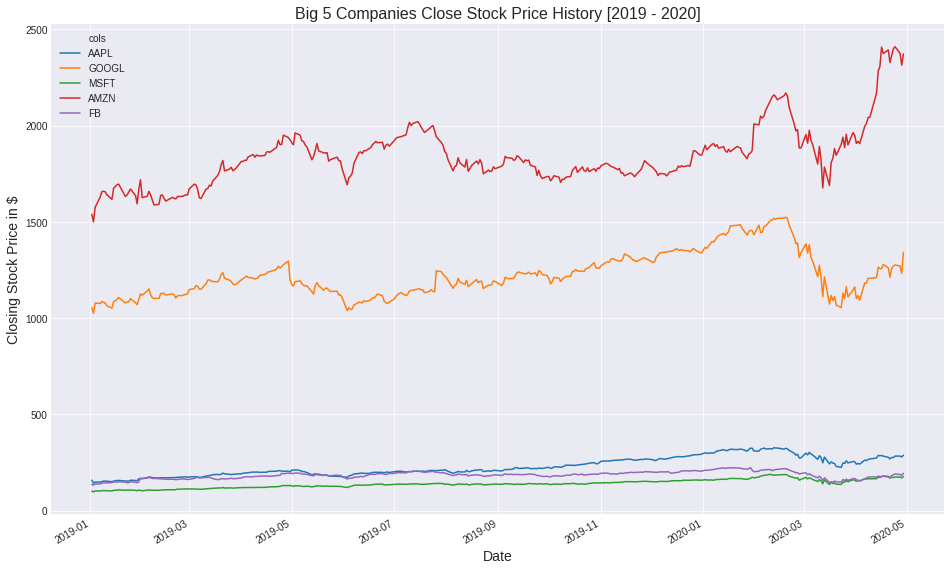

In [10]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Investigation

## Seperate Dataframe into 2 parts, first part i AAPL, MSFT and FB. The other part is for Goolge and Amazon (since the stock price of the first 3 is near equal to each other, and the other 2's are much higher, we seperate them for easier comparision)

In [11]:
df_low = df[['AAPL', 'MSFT', 'FB']]
df_high = df[['GOOGL', 'AMZN']]
print(df_high)

                  GOOGL         AMZN
Date                                
2019-01-02  1054.680054  1539.130005
2019-01-03  1025.469971  1500.280029
2019-01-04  1078.069946  1575.390015
2019-01-07  1075.920044  1629.510010
2019-01-08  1085.369995  1656.579956
...                 ...          ...
2020-04-23  1271.170044  2399.449951
2020-04-24  1276.599976  2410.219971
2020-04-27  1270.859985  2376.000000
2020-04-28  1232.589966  2314.080078
2020-04-29  1342.180054  2372.709961

[334 rows x 2 columns]


## Plotting AAPL, MSFT, FB

In [12]:
df_plot = df_low.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

In [13]:
print(df_plot)

           Date  cols        vals
0    2019-01-02  AAPL  157.919998
1    2019-01-03  AAPL  142.190002
2    2019-01-04  AAPL  148.259995
3    2019-01-07  AAPL  147.929993
4    2019-01-08  AAPL  150.750000
...         ...   ...         ...
997  2020-04-23    FB  185.130005
998  2020-04-24    FB  190.070007
999  2020-04-27    FB  187.500000
1000 2020-04-28    FB  182.910004
1001 2020-04-29    FB  194.190002

[1002 rows x 3 columns]


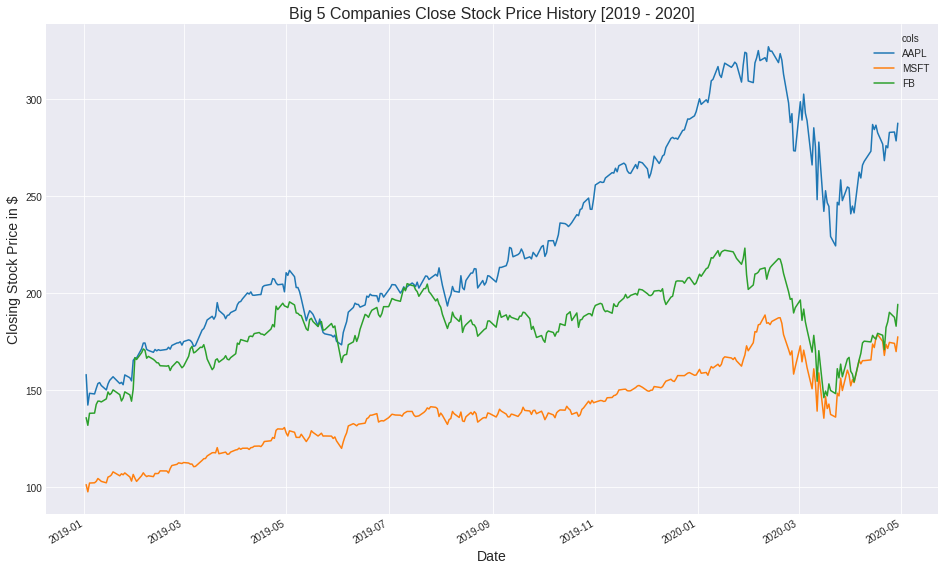

In [14]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Zoom into a random 30 consecutive days

In [15]:
df_plot = df_low[-30:].reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

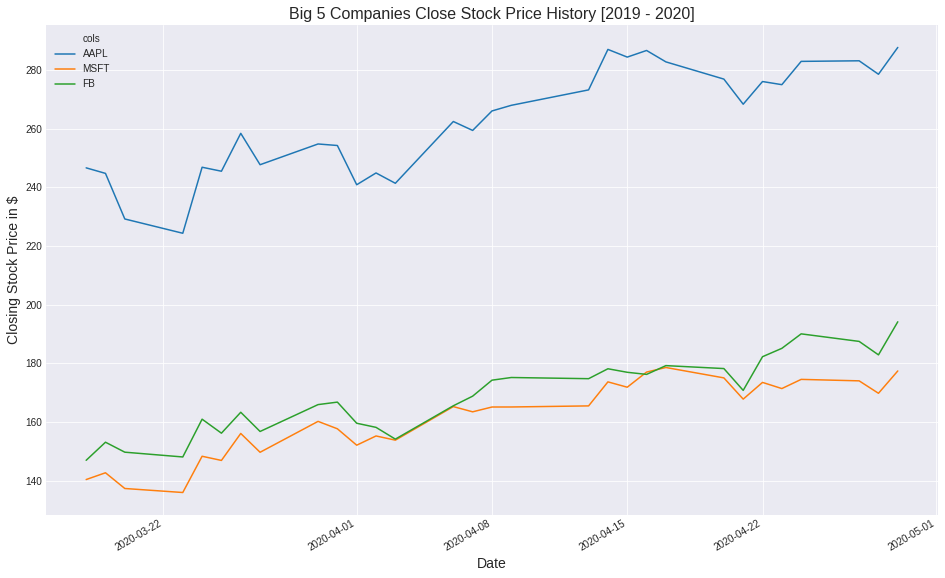

In [16]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Plotting GOOGL and AMZN

In [17]:
df_plot = df_high[:].reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

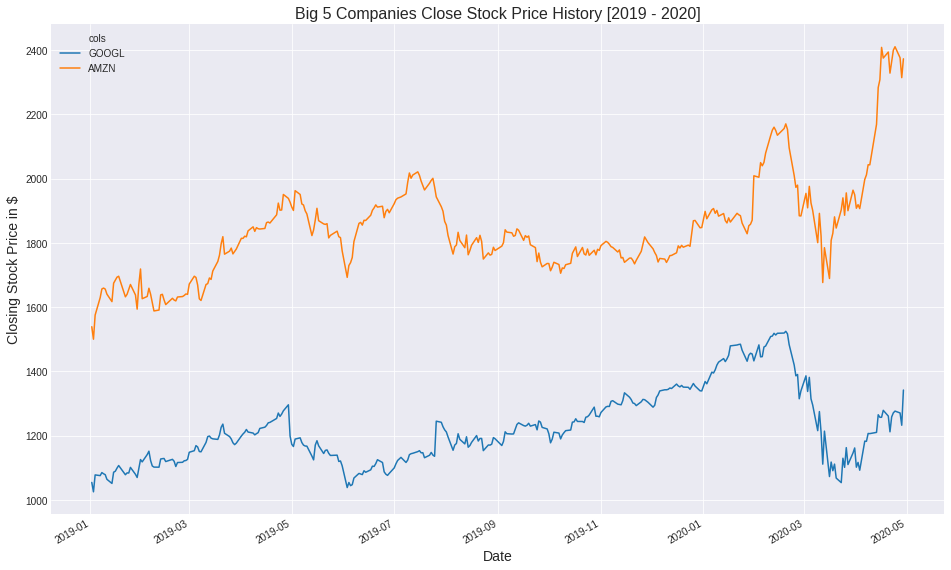

In [18]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Zoom into a random 30 consecutive days

In [19]:
df_plot = df_high[270:300].reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

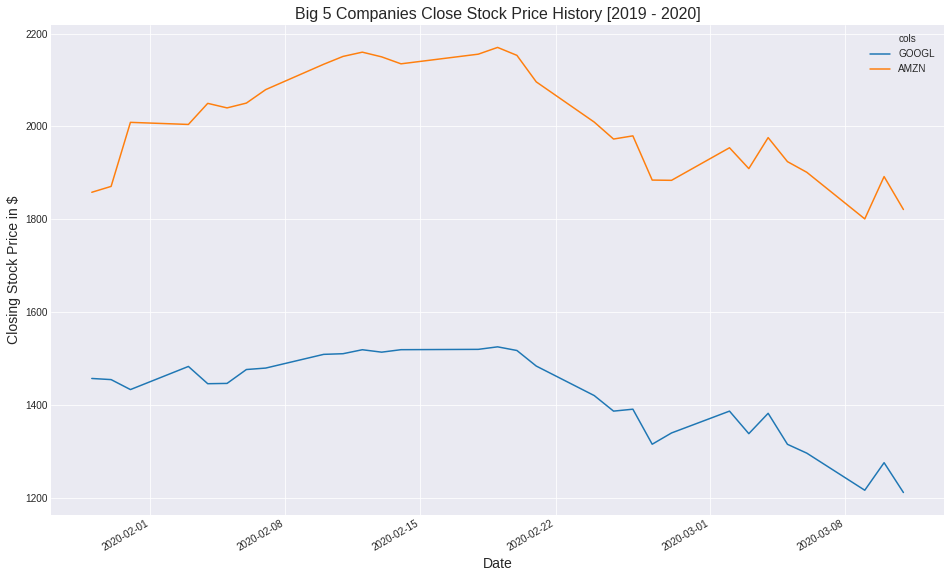

In [20]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Based on the plots above, we can see that there's a correlation between the stock prices since they all appear to fluctuate at the same time with a similar pattern. 

# My model

### Create X, y matrices for regression. X = yesterday and a day a week before, lastweek = a number divisible for 7.

In [33]:
def create_Xy(df):
    '''df has index as date
    columns are stock price of the companies
    '''
    yesterday, lastweek, y, dates = [], [], [], []
    for row_idx in range(1,len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1))
        yesterday.append( df.iloc[row_idx-1,:].values.reshape(-1))
        lastweek.append( df.iloc[7*((row_idx-1)//7),:].values.reshape(-1))
        dates.append(df.index[row_idx])
    yesterday, lastweek, y = np.array(yesterday), np.array(lastweek), np.array(y)
    X = np.hstack((yesterday, lastweek))
    return X, y, dates

X,y,dates = create_Xy(df)
# use 7/10 of the dataset to train (use past price to predict future price)
#n_train = len(y) * 7 // 10
#X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

(333, 5) (333, 5)


### Create a Linear Regression Model to predict stock price

In [0]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

## Plotting AAPL prediction vs ground truth 

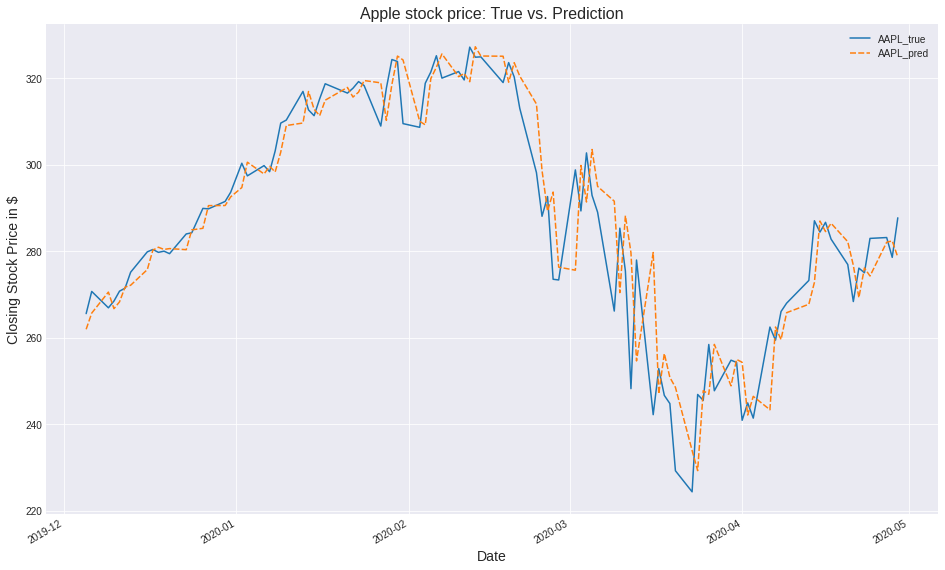

In [24]:
df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Evaluation using mean relative error

In [25]:
from sklearn.metrics import mean_squared_error

def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

for i in range(5):
    print( df.columns[i], mean_relative_error(y_test[:,i], ypred[:,i]))



AAPL 0.024321260441443407
GOOGL 0.021886139290025537
MSFT 0.02406611790698093
AMZN 0.018693307916045836
FB 0.03230678576166667


## Find the determining feature

## We can see that the biggest attributes lies on the first half of the coefficents, since Yesterday occupied this first half, I conclude that Yesterday stock price is the determining feature.

In [40]:
params = clf.coef_

max_features = np.amax(params, axis=1)
print('Max coefficents: ',max_features)
print('Coefficents: ',params)

Max coefficents:  [1.00252466 0.84214906 0.92666619 0.99246096 0.87448386]
Coefficents:  [[ 1.00252466e+00 -1.79111194e-02 -4.22294338e-02 -1.00629374e-03
   1.90363276e-02 -1.55923477e-02  1.76678586e-02  1.07476694e-01
  -3.99873426e-03 -3.74638420e-02]
 [ 5.81906508e-01  8.42149057e-01 -1.28193676e+00  2.31793920e-02
  -3.06575021e-01 -3.97639725e-02  2.21243987e-02  7.38909157e-01
  -1.57139933e-02  1.78677235e-01]
 [ 3.04609990e-02 -1.23734547e-02  9.26666189e-01 -3.36712239e-03
  -1.63139794e-02  2.02122526e-02  2.64120028e-03  8.30316694e-03
   5.03420608e-03 -2.92602339e-03]
 [ 3.09111901e-01 -2.85235519e-01  6.07620055e-01  9.92460962e-01
  -8.24234971e-01  2.26197179e-01  1.61248262e-01 -9.20825238e-01
   2.64469951e-02  2.32383756e-01]
 [ 8.47922895e-02 -2.33548209e-02 -8.16555498e-02  8.78220283e-03
   8.74483864e-01  3.48897112e-03  9.08865057e-03  4.31954164e-02
   2.95172650e-03 -3.13104886e-02]]
